In [ ]:
import pandas as pd
file_path='/content/Online_retail[1].xlsx'
df=pd.read_excel(file_path)

df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [ ]:
df.columns=['Transactions']
df['Transactions']=df['Transactions'].apply(lambda x: x.split(','))
df.head()

,Transactions
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, milk, energy bar, whole wheat ..."
4,[low fat yogurt]


In [ ]:
encoded_df=pd.DataFrame([{item: 1 for item in transaction} for transaction in df['Transactions']]).fillna(0)
encoded_df=encoded_df.astype(int)
encoded_df.head()

,burgers,meatballs,eggs,chutney,turkey,avocado,mineral water,milk,energy bar,whole wheat rice,...,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins,whole weat flour
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets=apriori(encoded_df,min_support=0.01,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256
2,(burgers),(turkey),0.087200,0.062533,0.010667,0.122324,1.956143,1.0,0.005214,1.068124,0.535484,0.076702,0.063779,0.146450
3,(turkey),(burgers),0.062533,0.087200,0.010667,0.170576,1.956143,1.0,0.005214,1.100522,0.521395,0.076702,0.091341,0.146450
4,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,1.0,0.003623,1.057693,0.162675,0.081045,0.054546,0.191111


Lift > 1: Items in the antecedents and consequents are more likely to be bought together than randomly.

Example: Burgers → Eggs (Lift: 1.83) means that people who buy burgers are 1.83 times more likely to buy eggs than random chance.

High Confidence: Indicates strong relationships.

Example: Burgers → Eggs (Confidence: 33%) means that 33% of people who buy burgers also buy eggs.

Support: Indicates how often the itemset appears in transactions.

Example: Support 0.0288 (2.88%) means that burgers and eggs appear together in 2.88% of all transactions.

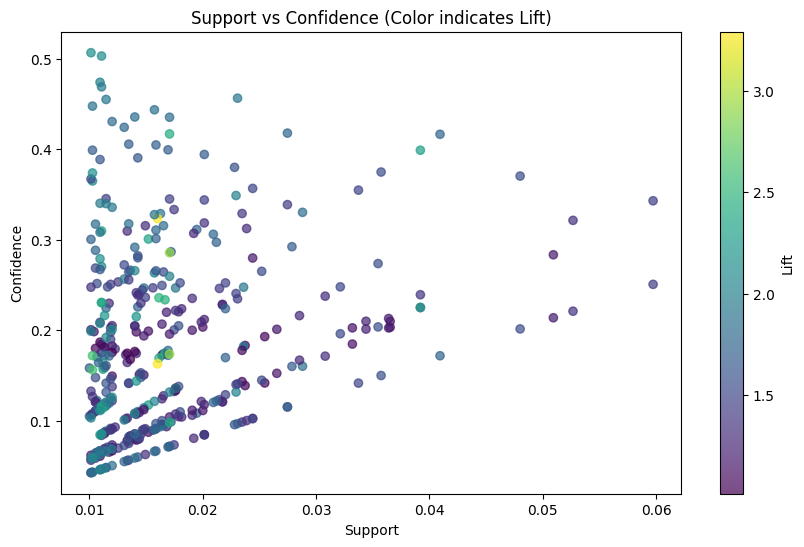

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence (Color indicates Lift)")
plt.show()


from the generated rules, we can see relationships between frequently purchased products:

1 burgers and eggs (lift:1.83, confidence:33%)
customers buying burgers tend to buy eggs.

2 burgers and turkey(lift:1.95, confidence:12%)
turkey is often bought when customers pruchase burgers.

3 burgers and mineral wayer(lift:1.17, confidence:28%)
mineral water is commonly bought with burgers

Customer Purchasing Behavior Insights

Meal-Based Shopping: Customers tend to buy items that complement each other in meals (e.g., burgers + eggs, burgers + turkey).

Health-Conscious Choices: Mineral water appears frequently in purchases, suggesting that customers prefer a balanced diet.

Opportunities for Bundling: Businesses can create combo offers, such as "Burger + Egg + Drink" deals to increase sales.

Cross-Selling Potential: Retailers can place these frequently bought-together items close to each other for better customer experience.


INTERVIEW QUESTIONS:

1: what is lift, and why is it important in association rules?

lift measures how more likely two items are to be purchased together compared to if they were independent.

formula: lift=confidence(A->B)/support(B)

-lift > 1--> A and B are positively correlated(bought together more tha expected)
-lift = 1--> no correlation
-lift < 1--> A and B are negatively correlated

importance:

helps in identifying strong and meaningful rules.

filters out random associations that may appear just by chance.

useful in retail for product bundling and cross-selling strategies.



---
2 what are support and confidence? how do you calculate them?

support: measures how frequently an itemset appears in the dataset. it indicates how popular an item or combination of items is.

formula: Support(A-->B)=transcations containing both A and B/total transactions

confidence: measures how often item B is bought when item A is bought. It indicates the reliability of the rule.

formula:

confidence(A-->B)= Support(A-->B)/support(A)

example:

if burgers-->eggs has support= 0.0288, it means 2.88% of total transactions include both items.

if confidence=33% it means 33% of the time when burgers are bought, eggs are also bought.



---
3 What are some limitations or challenges of Association Rule Mining?

Challenges:

-Too Many Rules: If thresholds (support/confidence) are too low, a large number of unimportant rules may be generated.


-Computational Complexity: Mining rules for large datasets requires high processing power.

-Redundant or Irrelevant Rules: Many rules may not be useful in business decision-making.

-Low Interpretability: Some rules may not have a clear business interpretation.

-Data Quality Issues: Noisy or missing data can affect rule quality.

-Scalability: As the dataset grows, the number of possible item combinations increases exponentially.

-Solution: Use threshold tuning (support, confidence, lift) and prune weak rules to focus on meaningful insights.



